# Bias Adjustment Notebook

### Summary
This Bias Adjustment Notebook outlines a methodology for adjusting CMIP temperature model data, which was found to be consistently cooler than observed station data. The primary goal is to align model projections with historical station data to improve the accuracy of future climate projections. I worked with my client, Mel Reasoner, who had previously manually adjusted this data using Excel. To streamline the process, I introduced Mel to a Python-based approach, providing him with a detailed walkthrough of the methodology, while keeping the Excel format for familiarity.

The analysis involved comparing historical station data with future CMIP model projections over the same time periods. A key observation we had made previously was that temperatures varied significantly by season and month, necessitating an adjustment based on average monthly differences. The result was intended to be an automated, reusable tool that allowed Mel to apply bias adjustments more efficiently in the future, replacing manual processes with an adaptable "plug and play" method. I made a point to break down each individual section of code so it would make sense to someone learning coding for the first time, ensuring it was easy to understand when revisiting the notebook in the future. These steps include:

### 1. Load and preprocess data:
- Import observed temperature data and model data from CSV files, convert date columns, and set the date as the index for easier time-series manipulation.

### 2. Visualize raw data:
- Plot the observed and model data to visually inspect the initial temperature trends.

### 3. Resample data to monthly averages:
- Resample both observed and model data to calculate monthly mean temperatures for comparison.

### 4. Calculate monthly bias:
- Compute the bias (difference) between the observed and model data on a monthly basis, 
- focusing on a specific time range (1993-01-31 to 2022-12-31).

### 5. Generate bias adjustments: 
- Calculate the average bias for each month over multiple years to identify systematic differences between model and observed data.

### 6. Apply bias adjustment: 
- Adjust the model data by applying the calculated bias adjustments for each month to bring the model data in line with observed data.

### 7. Export bias-adjusted data: 
- Save the adjusted model data to a new CSV file for further use or analysis.

### 8. Visualize comparison: 
- Create interactive plots to compare the observed data, original model data, and bias-adjusted model data, and save the plot as an HTML file.

### Importing neccissary packages
- In this program we use pandas to do the analysis, plotting, and bias adjustments
1. `pandas (pd)`:
    - Pandas is a data manipulation library used for handling structured data (like CSVs or databases). It provides data structures like DataFrames to analyze and process large datasets efficiently.

2. `matplotlib.pyplot (plt)`:
    - MatPlotLib is a plotting library for creating static, 2D visualizations (e.g., line plots, bar charts). It is widely used for generating basic plots to visualize data trends and distributions.

3. `plotly.graph_objects (go)`:
    - Plotly is another library used for creating interactive, web-based visualizations. It allows for more advanced, customizable plots that enable user interactions such as zooming or hovering.

In [10]:
# !pip install pandas plotly matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# 1. Loading Data

### Reading in the Nelson Station maximum temperature data `.csv`
- `pd.read_csv()`: This function from the pandas library reads a CSV (Comma-Separated Values) file and loads its contents into a DataFrame, which is a table-like data structure provided by pandas for easy manipulation of data.
- `'Nelson Tx Test.csv'`: This is the file name of the CSV being loaded. It likely contains observed daily temperature data, such as dates and corresponding temperature values.
- `observed_data`: This variable stores the data read from the CSV. Once loaded into this DataFrame, the data can be analyzed, manipulated, or visualized.

In [11]:
observed_data = pd.read_csv('./Data/Nelson Tx Test.csv')

### Converting the `Date` column into '`datetime`' variables
- datetime objects are the standard for using dates in Python

- `pd.to_datetime()`: This function converts the values in the 'Date' column of the observed_data DataFrame from their original format (likely strings) into a datetime object. 
    - This allows for more efficient date and time operations, such as filtering by date, resampling, or performing time-based calculations.
- `observed_data['Date']`: This accesses the 'Date' column in the DataFrame, where the conversion takes place.

- `set_index('Date')`: This method sets the 'Date' column as the index of the DataFrame. By doing this, the DataFrame will use the dates as its row identifiers rather than the default numerical index (1, 2, 3, ...). 
    - This makes it easier to perform time series operations, as the index will now represent actual dates.
- `inplace=True`: This argument specifies that the operation should modify the existing DataFrame (observed_data) directly rather than returning a new DataFrame with the changes.

In [12]:
observed_data['Date'] = pd.to_datetime(observed_data['Date'])
observed_data.set_index('Date', inplace=True)

### Plotting Observed Station Data
- Automatic Plotting: The `plot()` method automatically generates a line plot for all numerical columns in the DataFrame against the index (which, in this case, is the 'Date' column). 
- This is useful for quickly visualizing trends over time, especially for time series data like daily temperatures.
- here we plot the daily data for the observed station data (1993-2023) in Nelson BC

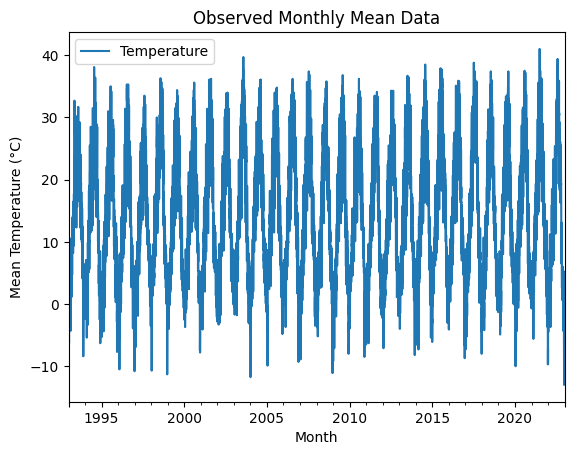

In [13]:
observed_data.plot(label='Observed Monthly Mean')

plt.title('Observed Monthly Mean Data')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')

plt.legend()

- Repeating the previous procedures: 
    - We will load the climate model data utilized for generating the adjusted temperature profiles.
- Importing the climate model data: This step involves gathering the dataset for the temperature adjustments.

In [14]:
model_data = pd.read_csv('./Data/All Models Dates Infilled.csv')
model_data['Date'] = pd.to_datetime(model_data['Date'])  # Convert 'Date' column to datetime format
model_data.set_index('Date', inplace=True)

### Plotting Model Projections
- Daily Maximum temperature data from 1950-2100 from the `tasmax_KACE-1-0-G_historical_ssp585 (°C)` model from the closest cell point to Nelson BC

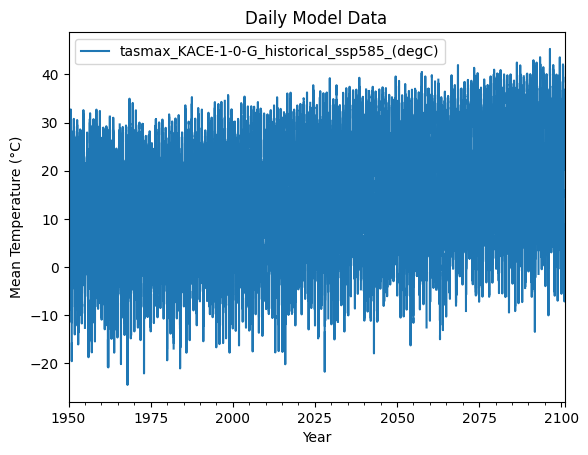

In [17]:
model_data.iloc[:, 0].plot(label=f'{model_data.columns[0]}')

# Adding title and labels
plt.title('Daily Model Data')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.legend()

### Resample the observed data to a monthly average
- `observed_data.resample('M')`: This takes the daily data from the observed_data DataFrame and groups it by months (since 'M' stands for monthly).
- `.mean()`: After grouping the data by month, it calculates the average temperature for each month.

In [18]:
# Resample observed and model data to monthly means
observed_monthly = observed_data.resample('M').mean()

C:\Users\lucas\AppData\Local\Temp\ipykernel_39836\2089754942.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  observed_monthly = observed_data.resample('M').mean()


- `observed_monthly.iloc[:, 0]`:
    - `iloc`: This is a method in pandas used for selecting data by position (index-based selection).
    - `[:, 0]`: This selects all rows (:) from the first column (0) in the `observed_monthly` DataFrame. It assumes that the first column contains the temperature values.

- The data is derived from resampled monthly station observations in Nelson, BC.
- Mel's previous work focused on adjusting temperature values by calculating the absolute difference between the average temperatures of model data and station data over a 30-year period.
- We hypothesized that segmenting the data by month and applying monthly bias adjustments would provide a more accurate representation for Mel's analysis, particularly by accounting for seasonal variability.
- On average, the station data temperatures were significantly warmer than the model data.

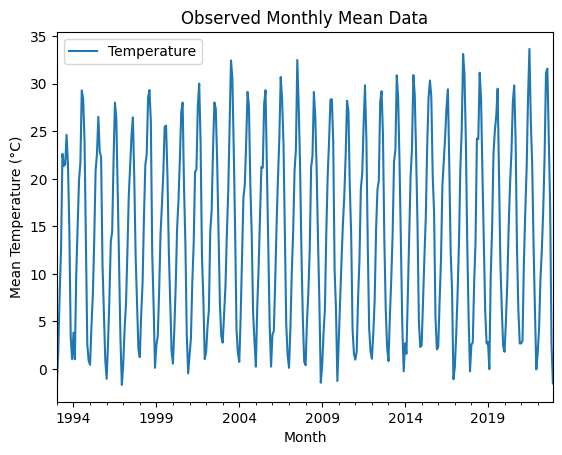

In [19]:
observed_monthly.plot(label='Observed Monthly Mean')

# Adding title and labels
plt.title('Observed Monthly Mean Data')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')

# Adding a legend
plt.legend()

### Resample the model data to a monthly average

- `model_data.resample('M').mean()`:
    - Resampling: This groups the daily data from `model_data` into monthly intervals (`'M'` stands for monthly).
    - `.mean()`: It calculates the average of the model's temperature values for each month.
        - The result is saved in `model_monthly`, which now contains monthly averages instead of daily values.

- `model_monthly.loc['1993-01-31':'2022-12-31']`:
    - `.loc[]`: This is used to access a specific range of data based on the index (which is the date).
    - `'1993-01-31':'2022-12-31'`: This selects all the rows between January 31, 1993, and December 31, 2022.

In [20]:
model_monthly = model_data.resample('M').mean()
model_monthly.loc['1993-01-31':'2022-12-31']

C:\Users\lucas\AppData\Local\Temp\ipykernel_39836\2411148978.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  model_monthly = model_data.resample('M').mean()


,tasmax_KACE-1-0-G_historical_ssp585_(degC),tasmax_KACE-1-0-G_historical_ssp245_(degC),tasmax_HadGEM3-GC31-LL_historical_ssp585_(degC),tasmax_HadGEM3-GC31-LL_historical_ssp245_(degC),tasmax_UKESM1-0-LL_historical_ssp585_(degC),tasmax_UKESM1-0-LL_historical_ssp245_(degC),tasmax_CMCC-ESM2_historical_ssp585_(degC),tasmax_CMCC-ESM2_historical_ssp245_(degC),tasmax_GFDL-ESM4_historical_ssp585_(degC),tasmax_GFDL-ESM4_historical_ssp126_(degC),...,tasmax_MPI-ESM1-2-HR_historical_ssp585_(degC),tasmax_EC-Earth3-Veg_historical_ssp245_(degC),tasmax_EC-Earth3-Veg_historical_ssp126_(degC),tasmax_EC-Earth3-Veg_historical_ssp585_(degC),tasmax_ACCESS-ESM1-5_historical_ssp245_(degC),tasmax_ACCESS-ESM1-5_historical_ssp126_(degC),tasmax_ACCESS-ESM1-5_historical_ssp585_(degC),tasmax_ACCESS-CM2_historical_ssp245_(degC),tasmax_ACCESS-CM2_historical_ssp126_(degC),tasmax_ACCESS-CM2_historical_ssp585_(degC)
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-31,0.035503,0.035401,-2.278884,-2.278884,-1.896594,-1.896594,-1.799137,-1.799137,-3.095071,-3.095071,...,0.334074,-4.992407,-4.992407,-4.992407,-4.983448,-4.983448,-4.983547,-3.733882,-3.733882,-3.733882
1993-02-28,-1.224318,-1.224318,2.516539,2.516539,-3.690939,-3.690939,3.080251,3.080251,-0.905187,-0.905187,...,3.499002,1.504321,1.504321,1.504321,-1.773425,-1.773425,-1.773425,0.601532,0.601532,0.601532
1993-03-31,3.720759,3.720759,5.263751,5.263751,3.284758,3.284758,5.233105,5.233105,6.446148,6.446148,...,7.645310,1.672536,1.672536,1.672536,3.634255,3.634255,3.634255,5.059546,5.059645,5.059645
1993-04-30,8.227358,8.227358,11.783218,11.783320,7.609673,7.609673,7.848121,7.848121,12.435084,12.435084,...,10.913658,9.109533,9.109533,9.109533,6.591693,6.591693,6.591693,8.689503,8.689605,8.689503
1993-05-31,14.365655,14.365655,15.449350,15.449350,13.476461,13.476461,16.953214,16.953214,16.989048,16.989146,...,17.086410,18.948503,18.948503,18.948601,10.885834,10.885834,10.885932,18.121858,18.121858,18.121858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,30.310313,27.626252,26.131478,29.069043,28.539453,30.421704,20.255659,23.611265,23.835524,23.935544,...,21.239325,26.775198,22.705963,22.945972,27.193000,23.551903,23.437116,26.299905,24.303139,25.873341
2022-09-30,25.087049,22.719460,21.322445,21.962510,18.568091,16.466618,19.278042,18.640622,16.301109,19.304186,...,17.775537,20.753589,17.748478,22.751809,18.679990,16.522568,20.834767,16.737720,21.662111,20.937104
2022-10-31,7.750158,11.831844,11.014571,9.249306,13.958544,11.981789,11.251164,6.633982,9.807858,10.335328,...,11.237283,9.523843,9.002772,8.476976,13.647618,9.993033,12.026913,10.661575,12.730108,5.880777


### Calculating the montly bias
- Taking the difference between observed and monthly averages

- `monthly_bias` = `pd.DataFrame()`:
    - This creates an empty DataFrame called monthly_bias. It's likely being prepared to store the bias (difference) between the observed and model data.

- `for column in model_monthly.columns:`:
    - This loop goes through each column in the model_monthly DataFrame. Each column represents a set of model data (e.g., different climate models or scenarios).

- `model_monthly[column] = observed_monthly['Temperature'] - model_monthly[column]`:
    - For each column in model_monthly, it calculates the difference between the observed monthly temperatures (observed_monthly['Temperature']) and the model monthly temperatures (model_monthly[column]).
    - This difference (bias) is then stored back into the model_monthly DataFrame, replacing the original model values with the bias values for each month.


This code calculates the monthly bias for each climate model by subtracting the model's temperature from the observed temperature, showing how much the model's data deviates from the real data.

In [21]:
monthly_bias = pd.DataFrame()

for column in model_monthly.columns:
    model_monthly[column] = observed_monthly['Temperature'] - model_monthly[column]

- `model_monthly`: 
    - This is a pandas DataFrame or Series that containing resampled monthly data

- `.loc[]`: 
    - This is a method used to access a group of rows and columns by labels. In this case, it's being used to filter rows based on a date range.

- `'1993-01-31':'2022-12-31'`: 
    - These are two dates specifying the start and end of the range. The code is selecting data from the date `1993-01-31` to `2022-12-31`, inclusive. 
    - These specified dates are selected to match the period of the observed data for bias calculation.

The variable monthly_bias will now store the data from `model_monthly` within this date range. Only rows with dates between January 31, 1993, and December 31, 2022, will be included.

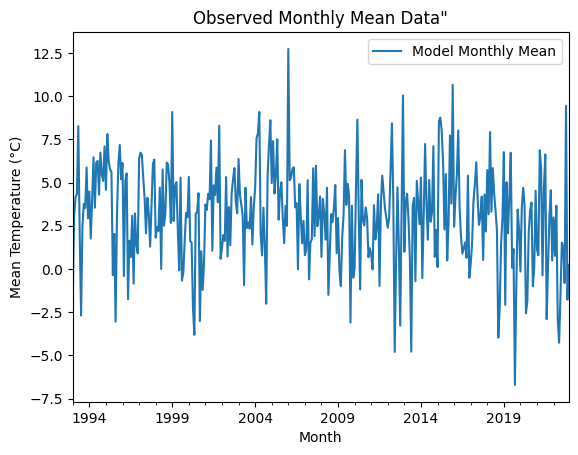

In [22]:
monthly_bias = model_monthly.loc['1993-01-31':'2022-12-31']

monthly_bias.iloc[:,0].plot(label=f'Model Monthly Mean')

plt.title(f'Observed Monthly Mean Data"')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.legend()

## Taking the averages of monthly data
### Apply bias correction to model data

- `monthly_bias.index.month`:
    - `monthly_bias.index` accesses the index (the row labels) of the DataFrame, which is probably a date range.
    - `.month `extracts the month (as number from 1 to 12) from each date in the index.

- `.groupby(monthly_bias.index.month)`:
    - The `groupby` method organizes the DataFrame into groups based on the month extracted from the index. For example, all data points from January will be grouped together, all from February together, and so on.

- `.mean()`:
    - After grouping the data by month, the mean() function calculates the average of each group. So, for each month, it computes the average value of the data in that month across all years available in the DataFrame.

In [23]:
bias_adjustment = monthly_bias.groupby(monthly_bias.index.month).mean()

- This plot illustrates the average monthly temperature difference for the first model, tasmax_KACE-1-0-G_historical_ssp585 (°C), over the historical data period.
- The temperature differences between colder and warmer months are significant, ranging from 2.5°C to 4.5°C. 
- This provides validation for our hypothesis and supports the use of a monthly timescale for bias adjustment.

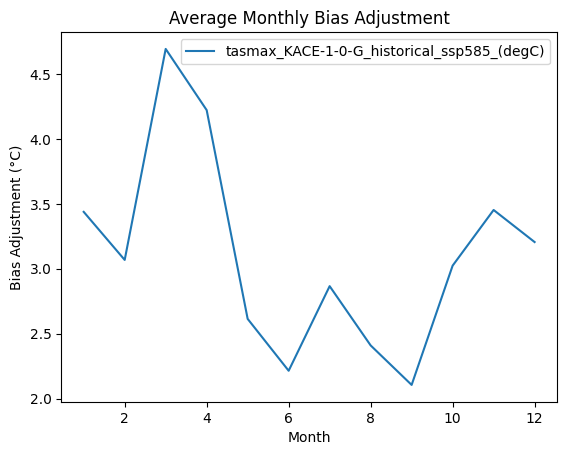

In [24]:
bias_adjustment.iloc[:,0].plot()
plt.title('Average Monthly Bias Adjustment')
plt.xlabel('Month')
plt.ylabel('Bias Adjustment (°C)')

# Adding a legend
plt.legend()

### Load climate model daily temperature data

- `all_model_data['Date']`:
    - This accesses the column named Date in the all_model_data DataFrame.

- `pd.to_datetime(all_model_data['Date'])`:
    - The `to_datetime` function converts the values in the Date column to a `datetime` format. This means that the dates are now recognized as date objects, allowing for date-related operations and comparisons.

- `all_model_data.set_index('Date', inplace=True)`:
    - The `set_index` method sets the Date column as the index of the DataFrame. This means that the rows of the DataFrame will now be labeled by date rather than the default integer index.
    - The parameter `inplace=True` modifies the existing DataFrame directly without creating a new one.

In [26]:
all_model_data = pd.read_csv('./Data/All Models Dates Infilled.csv')
all_model_data['Date'] = pd.to_datetime(all_model_data['Date'])  # Convert 'Date' column to datetime format
all_model_data.set_index('Date', inplace=True)
all_model_data

,tasmax_KACE-1-0-G_historical_ssp585_(degC),tasmax_KACE-1-0-G_historical_ssp245_(degC),tasmax_HadGEM3-GC31-LL_historical_ssp585_(degC),tasmax_HadGEM3-GC31-LL_historical_ssp245_(degC),tasmax_UKESM1-0-LL_historical_ssp585_(degC),tasmax_UKESM1-0-LL_historical_ssp245_(degC),tasmax_CMCC-ESM2_historical_ssp585_(degC),tasmax_CMCC-ESM2_historical_ssp245_(degC),tasmax_GFDL-ESM4_historical_ssp585_(degC),tasmax_GFDL-ESM4_historical_ssp126_(degC),...,tasmax_MPI-ESM1-2-HR_historical_ssp585_(degC),tasmax_EC-Earth3-Veg_historical_ssp245_(degC),tasmax_EC-Earth3-Veg_historical_ssp126_(degC),tasmax_EC-Earth3-Veg_historical_ssp585_(degC),tasmax_ACCESS-ESM1-5_historical_ssp245_(degC),tasmax_ACCESS-ESM1-5_historical_ssp126_(degC),tasmax_ACCESS-ESM1-5_historical_ssp585_(degC),tasmax_ACCESS-CM2_historical_ssp245_(degC),tasmax_ACCESS-CM2_historical_ssp126_(degC),tasmax_ACCESS-CM2_historical_ssp585_(degC)
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-01,0.392157,0.392157,-3.596551,-3.596551,-5.400167,-5.400167,-13.884182,-13.884182,-8.265811,-8.265811,...,-4.151979,-13.768213,-13.768213,-13.768213,-4.710459,-4.710459,-4.710459,-1.002518,-1.136797,-1.002518
1950-01-02,0.883497,0.883497,-3.044174,-3.044174,-4.829480,-4.829480,-16.713203,-16.713203,-7.936216,-7.936216,...,-4.292362,-12.214846,-12.214846,-12.214846,1.643396,1.643396,1.643396,-0.608835,-0.608835,-0.608835
1950-01-03,1.020828,1.020828,-2.064545,-2.064545,-2.082856,-2.082856,-12.190431,-12.190431,-7.704279,-7.704279,...,-4.695200,-5.830471,-5.830471,-5.830471,2.363622,2.363622,2.363622,0.630197,3.019760,0.630197
1950-01-04,0.950637,0.950637,-3.413443,-3.413443,-0.941482,-0.941482,-9.855801,-9.855801,-5.098039,-5.098039,...,-3.791866,-11.967649,-11.967649,-11.967649,-0.569161,-0.569161,-0.569161,4.060425,4.667734,4.060425
1950-01-05,-4.682993,-4.682993,0.672923,0.672923,-2.992294,-2.992294,-7.194628,-7.194628,2.052338,2.052338,...,-2.674906,-14.958417,-14.958417,-14.958417,0.535592,0.535592,0.535592,-1.805142,-1.048295,-1.805142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-27,4.463263,-4.850842,4.890516,1.783779,5.381856,-0.251774,0.694285,-9.202715,-1.585412,-5.561913,...,1.139849,-1.890593,1.658655,3.718623,-0.453193,1.704433,-2.290379,0.398260,2.046235,-1.536583
2100-12-28,4.011596,-1.933318,4.863049,-7.698175,5.171282,3.865110,0.532540,-5.296406,0.999466,-1.728847,...,0.379950,0.788891,1.728847,3.797970,0.096132,1.072709,-1.942473,1.091020,1.170367,1.643396
2100-12-29,1.356527,-1.963836,5.656518,0.459296,4.863049,4.081788,0.965896,-4.194705,1.582360,-1.322957,...,1.127642,-2.238498,1.496910,3.886472,-0.965896,0.544747,1.206989,1.054398,2.253757,1.686122


### Loop through the full pandas dataframe of all model data

- `for column in [col for col in all_model_data.columns]`
    - `[col for col in all_model_data.columns]` creates a list of each individual model
    - creates a loop to go through all the models in our csv
    - for each column in our list our bias adjusment will be performed
- `for month in range(1,13):`
    - loops through all months and performs our bias adjustment on each individual month 

- ` all_model_data.loc[all_model_data.index.month==month, column]`
    - groups our data by each month in for each model
    - `+= bias_adjustment.loc[month, 'Temperature']`
        - adds our bias adjustment to each day in each month


This Python code seems to be adjusting some values in a DataFrame called `all_model_data` using bias adjustments from another DataFrame called `bias_adjustment`. Let's break down the code step by step:

1. `for column in [col for col in all_model_data.columns]:`:
   - This loop iterates over each column in the DataFrame `all_model_data`.
   - `all_model_data.columns` returns a list of column names in the DataFrame.
   - `[col for col in all_model_data.columns]` is a list comprehension that creates a new list containing all the column names from `all_model_data`.

2. `for month in range(1, 13):`:
   - This loop iterates over each month from 1 to 12.

3. `all_model_data.loc[all_model_data.index.month==month, column] += bias_adjustment.loc[month, column]`:
   - This line of code adjusts the values in `all_model_data` based on the bias adjustments from `bias_adjustment`.
   - `all_model_data.index.month==month` filters rows in `all_model_data` where the month matches the current iteration value.
   - `all_model_data.loc[...]` accesses the subset of `all_model_data` based on the filter.
   - `column` refers to the current column being processed.
   - `bias_adjustment.loc[month, column]` retrieves the bias adjustment value for the current month and column from the `bias_adjustment` DataFrame.
   - `+=` is the in-place addition operator, adding the bias adjustment value to the corresponding values in `all_model_data`.

In summary, this code loops through each column in `all_model_data`, and for each column, it iterates through each month. It then adjusts the values in `all_model_data` based on the bias adjustments stored in the `bias_adjustment` DataFrame.

In [27]:
bias_adjust_ed_models = all_model_data.copy(deep=True)

In [28]:
for column in [col for col in bias_adjust_ed_models.columns]:
    for month in range(1,13):
        bias_adjust_ed_models.loc[bias_adjust_ed_models.index.month==month, column] += bias_adjustment.loc[month, column]

In [29]:
bias_adjust_ed_models

,tasmax_KACE-1-0-G_historical_ssp585_(degC),tasmax_KACE-1-0-G_historical_ssp245_(degC),tasmax_HadGEM3-GC31-LL_historical_ssp585_(degC),tasmax_HadGEM3-GC31-LL_historical_ssp245_(degC),tasmax_UKESM1-0-LL_historical_ssp585_(degC),tasmax_UKESM1-0-LL_historical_ssp245_(degC),tasmax_CMCC-ESM2_historical_ssp585_(degC),tasmax_CMCC-ESM2_historical_ssp245_(degC),tasmax_GFDL-ESM4_historical_ssp585_(degC),tasmax_GFDL-ESM4_historical_ssp126_(degC),...,tasmax_MPI-ESM1-2-HR_historical_ssp585_(degC),tasmax_EC-Earth3-Veg_historical_ssp245_(degC),tasmax_EC-Earth3-Veg_historical_ssp126_(degC),tasmax_EC-Earth3-Veg_historical_ssp585_(degC),tasmax_ACCESS-ESM1-5_historical_ssp245_(degC),tasmax_ACCESS-ESM1-5_historical_ssp126_(degC),tasmax_ACCESS-ESM1-5_historical_ssp585_(degC),tasmax_ACCESS-CM2_historical_ssp245_(degC),tasmax_ACCESS-CM2_historical_ssp126_(degC),tasmax_ACCESS-CM2_historical_ssp585_(degC)
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-01,3.830675,4.196956,0.101370,0.391420,-1.996168,-1.721459,-9.815185,-10.010966,-4.025903,-4.214071,...,0.199474,-10.152740,-10.300506,-9.945877,-1.195128,-1.483041,-1.280916,2.221465,2.446166,2.278199
1950-01-02,4.322015,4.688296,0.653747,0.943797,-1.425481,-1.150771,-12.644206,-12.839987,-3.696308,-3.884476,...,0.059091,-8.599373,-8.747139,-8.392510,5.158728,4.870815,5.072939,2.615148,2.974128,2.671882
1950-01-03,4.459346,4.825627,1.633376,1.923426,1.321142,1.595852,-8.121434,-8.317215,-3.464371,-3.652539,...,-0.343747,-2.214998,-2.362765,-2.008135,5.878953,5.591040,5.793165,3.854180,6.602723,3.910914
1950-01-04,4.389155,4.755436,0.284479,0.574529,2.462517,2.737227,-5.786804,-5.982585,-0.858130,-1.046299,...,0.559587,-8.352176,-8.499942,-8.145313,2.946170,2.658257,2.860381,7.284408,8.250697,7.341142
1950-01-05,-1.244475,-0.878194,4.370844,4.660894,0.411705,0.686415,-3.125631,-3.321412,6.292246,6.104078,...,1.676547,-11.342944,-11.490710,-11.136081,4.050923,3.763010,3.965134,1.418840,2.534669,1.475574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-27,7.669126,-2.279355,7.690180,4.546476,8.486538,2.895626,3.404649,-6.359418,2.238197,-1.890270,...,4.449081,1.529463,4.784015,6.758036,2.904747,4.955828,1.026686,3.414818,5.059557,1.640991
2100-12-28,7.217459,0.638170,7.662714,-4.935479,8.275964,7.012510,3.242903,-2.453109,4.823075,1.942795,...,3.689182,4.208947,4.854206,6.837383,3.454071,4.324105,1.374592,4.107577,4.183689,4.820971
2100-12-29,4.562390,0.607652,8.456183,3.221993,7.967731,7.229188,3.676259,-1.351407,5.405969,2.348685,...,4.436874,1.181557,4.622269,6.925885,2.392044,3.796143,4.524054,4.070956,5.267079,4.863696


### save adjusted model as a csv

In [30]:
all_model_data

,tasmax_KACE-1-0-G_historical_ssp585_(degC),tasmax_KACE-1-0-G_historical_ssp245_(degC),tasmax_HadGEM3-GC31-LL_historical_ssp585_(degC),tasmax_HadGEM3-GC31-LL_historical_ssp245_(degC),tasmax_UKESM1-0-LL_historical_ssp585_(degC),tasmax_UKESM1-0-LL_historical_ssp245_(degC),tasmax_CMCC-ESM2_historical_ssp585_(degC),tasmax_CMCC-ESM2_historical_ssp245_(degC),tasmax_GFDL-ESM4_historical_ssp585_(degC),tasmax_GFDL-ESM4_historical_ssp126_(degC),...,tasmax_MPI-ESM1-2-HR_historical_ssp585_(degC),tasmax_EC-Earth3-Veg_historical_ssp245_(degC),tasmax_EC-Earth3-Veg_historical_ssp126_(degC),tasmax_EC-Earth3-Veg_historical_ssp585_(degC),tasmax_ACCESS-ESM1-5_historical_ssp245_(degC),tasmax_ACCESS-ESM1-5_historical_ssp126_(degC),tasmax_ACCESS-ESM1-5_historical_ssp585_(degC),tasmax_ACCESS-CM2_historical_ssp245_(degC),tasmax_ACCESS-CM2_historical_ssp126_(degC),tasmax_ACCESS-CM2_historical_ssp585_(degC)
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-01,0.392157,0.392157,-3.596551,-3.596551,-5.400167,-5.400167,-13.884182,-13.884182,-8.265811,-8.265811,...,-4.151979,-13.768213,-13.768213,-13.768213,-4.710459,-4.710459,-4.710459,-1.002518,-1.136797,-1.002518
1950-01-02,0.883497,0.883497,-3.044174,-3.044174,-4.829480,-4.829480,-16.713203,-16.713203,-7.936216,-7.936216,...,-4.292362,-12.214846,-12.214846,-12.214846,1.643396,1.643396,1.643396,-0.608835,-0.608835,-0.608835
1950-01-03,1.020828,1.020828,-2.064545,-2.064545,-2.082856,-2.082856,-12.190431,-12.190431,-7.704279,-7.704279,...,-4.695200,-5.830471,-5.830471,-5.830471,2.363622,2.363622,2.363622,0.630197,3.019760,0.630197
1950-01-04,0.950637,0.950637,-3.413443,-3.413443,-0.941482,-0.941482,-9.855801,-9.855801,-5.098039,-5.098039,...,-3.791866,-11.967649,-11.967649,-11.967649,-0.569161,-0.569161,-0.569161,4.060425,4.667734,4.060425
1950-01-05,-4.682993,-4.682993,0.672923,0.672923,-2.992294,-2.992294,-7.194628,-7.194628,2.052338,2.052338,...,-2.674906,-14.958417,-14.958417,-14.958417,0.535592,0.535592,0.535592,-1.805142,-1.048295,-1.805142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-27,4.463263,-4.850842,4.890516,1.783779,5.381856,-0.251774,0.694285,-9.202715,-1.585412,-5.561913,...,1.139849,-1.890593,1.658655,3.718623,-0.453193,1.704433,-2.290379,0.398260,2.046235,-1.536583
2100-12-28,4.011596,-1.933318,4.863049,-7.698175,5.171282,3.865110,0.532540,-5.296406,0.999466,-1.728847,...,0.379950,0.788891,1.728847,3.797970,0.096132,1.072709,-1.942473,1.091020,1.170367,1.643396
2100-12-29,1.356527,-1.963836,5.656518,0.459296,4.863049,4.081788,0.965896,-4.194705,1.582360,-1.322957,...,1.127642,-2.238498,1.496910,3.886472,-0.965896,0.544747,1.206989,1.054398,2.253757,1.686122


This line of code saves the DataFrame `bias_adjust_ed_models` to a CSV file named `Bias Adjust. All models Nelson Tx Model Test.csv`. After executing this line, you will find the data stored in a CSV format in the specified file, which can be opened and viewed in spreadsheet software or any text editor.

In [32]:
bias_adjust_ed_models.to_csv('./Data/Bias Adjust. All models Nelson Tx Model Test.csv')

In summary, the code computes the annual mean values for three datasets—bias-adjusted models, all model data, and observed data—by grouping each dataset by year and calculating the mean for each group. The resulting annual means are stored in separate variables for further analysis or reporting.

The code calculates the annual mean values for three different datasets: bias_adjust_ed_models, all_model_data, and observed_data. Each line performs the following steps:

In [33]:
yrmean_bias_adjust_ed_models = bias_adjust_ed_models.groupby(pd.Grouper(freq='Y')).mean()
yrmean_all_model_data= all_model_data.groupby(pd.Grouper(freq='Y')).mean()
yrmean_observed_data = observed_data.groupby(pd.Grouper(freq='Y')).mean()

C:\Users\lucas\AppData\Local\Temp\ipykernel_39836\2866227209.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yrmean_bias_adjust_ed_models = bias_adjust_ed_models.groupby(pd.Grouper(freq='Y')).mean()
C:\Users\lucas\AppData\Local\Temp\ipykernel_39836\2866227209.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yrmean_all_model_data= all_model_data.groupby(pd.Grouper(freq='Y')).mean()
C:\Users\lucas\AppData\Local\Temp\ipykernel_39836\2866227209.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yrmean_observed_data = observed_data.groupby(pd.Grouper(freq='Y')).mean()


By plotting these three datasets together, you can visually see how well the bias-adjusted models align with both the original model data and the observed data over time.

- The overall purpose of this code is to derive single average values for each year:
    - bias_adjust_mean holds the average annual means of all bias-adjusted models.
    - model_mean holds the average annual means of all models.
- This allows for easy comparison of the overall trends between the bias-adjusted models and all models over the specified timeframe.

In [34]:
bias_adjust_mean = yrmean_bias_adjust_ed_models.mean(axis=1)
model_mean = yrmean_all_model_data.mean(axis=1)

- A comparison plot between the mean of all unadjusted models and the mean of the bias-adjusted models.
- Historical observed data is overlaid on both plots to demonstrate the target values for model adjustment.
- The results indicate that the bias adjustment is performing as expected.

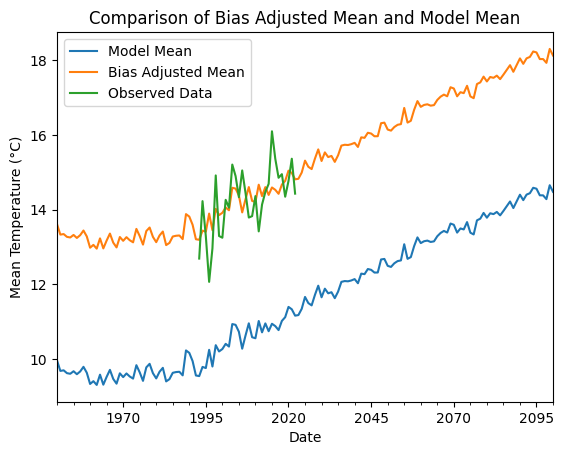

In [35]:
model_mean.plot(label='Model Mean')
bias_adjust_mean.plot(label='Bias Adjusted Mean')
yrmean_observed_data.iloc[:,0].plot(label='Observed Data')

plt.title('Comparison of Bias Adjusted Mean and Model Mean')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')

plt.legend()

- Here is the comparison for a single model

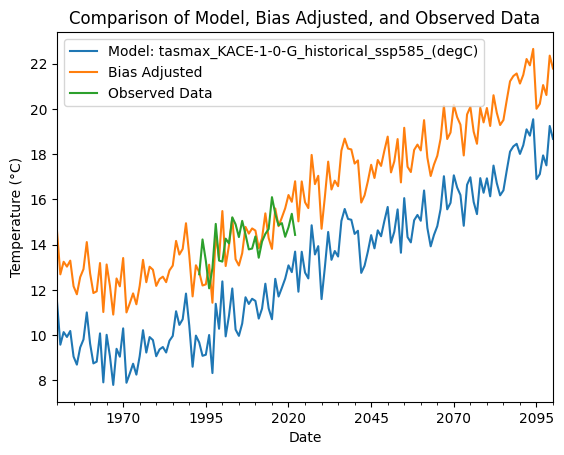

In [36]:
yrmean_all_model_data.iloc[:,0].plot(label=f'Model: {all_model_data.columns[0]}')
yrmean_bias_adjust_ed_models.iloc[:,0].plot(label='Bias Adjusted')
yrmean_observed_data.iloc[:,0].plot(label='Observed Data')

plt.title('Comparison of Model, Bias Adjusted, and Observed Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.legend()

In [37]:
yrmean_all_model_data.columns[0]

'tasmax_KACE-1-0-G_historical_ssp585_(degC)'

This code compares bias-adjusted model data, original model data, and observed temperature data over time by plotting them on the same graph.
- Key Features:
    - Different line styles (dashed, dotted, solid) are used to distinguish between the datasets.
    - The graph is interactive, allowing users to toggle visibility of individual traces via the legend.
    - The plot is saved as an HTML file for easy sharing.

This setup provides a clear visual comparison of how the bias-adjusted models and original models compare to observed temperature data.

In [38]:
traces = []
# Add traces for yrmean_bias_adjust_ed_models
for col_index, col in enumerate(yrmean_bias_adjust_ed_models.columns[1:], start=1):  # Skip the 'x' column
    color = f'rgb({col_index * 50 % 256}, {col_index * 70 % 256}, {col_index * 90 % 256})'  # Generating color based on column index
    traces.append(
        go.Scatter(
            x=yrmean_bias_adjust_ed_models.index, 
            y=yrmean_bias_adjust_ed_models[col], 
            mode='lines', 
            name='Adjusted -- '+col, 
            line=dict(shape='spline', dash='dash', color=color), 
            visible='legendonly', 
            legendgroup=col_index),
    
        )

# Add traces for yrmean_all_model_data with the same colors
for col_index, col in enumerate(yrmean_all_model_data.columns[1:], start=1):
    color = f'rgb({col_index * 50 % 256}, {col_index * 70 % 256}, {col_index * 90 % 256})'  # Reusing the same color as yrmean_bias_adjust_ed_models
    traces.append(
        go.Scatter(
            x=yrmean_all_model_data.index, 
            y=yrmean_all_model_data[col], 
            mode='lines', 
            name='Model -- '+col, 
            line=dict(shape='spline', dash='dot', color=color), 
            visible='legendonly', 
            legendgroup=col_index),

        )


# observed data
traces.append(go.Scatter(x=yrmean_observed_data.index, y=yrmean_observed_data['Temperature'], mode='lines', name='Observed', line=dict(shape='spline')))

# model average go.Scatter(x=df['Date'], y=df['0'], mode='lines', name='Value')
traces.append(go.Scatter(x=bias_adjust_mean.index, y=bias_adjust_mean.values, mode='lines', name='Adjusted Average', line=dict(shape='spline', dash='dash', color='goldenrod')))
traces.append(go.Scatter(x=model_mean.index, y=model_mean.values, mode='lines', name='Model Average', line=dict(shape='spline', dash='dot', color='goldenrod')))


fig = go.Figure(traces)

# Update layout
fig.update_layout(title='Comparison of Model Tx and Adjusted Tx with Observed Station Tx',
                  xaxis_title='Year',
                  yaxis_title='Temp. (Deg. C)')

# Display the figure
fig.show()

fig.write_html("Comparison.html")

#### Feel free to download Comparison.html to take a look at the finsihed product. (just open it in a browser)